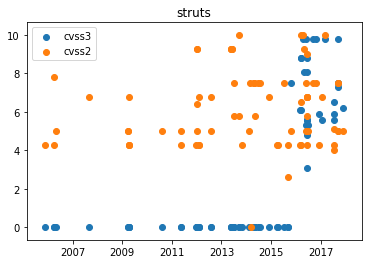

In [61]:
import urllib2

key = "struts"
url = "https://jvndb.jvn.jp/search/index.php?mode=_vulnerability_search_IA_VulnSearch&lang=ja&useSynonym=1&keyword="+urllib2.quote(key)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from bs4 import BeautifulSoup
instance = urllib2.urlopen(url)
soup = BeautifulSoup(instance, "html.parser")

date_list = []
cvss2_list = []
cvss3_list = []

for i in range(2,100):
    cvss3 = soup.select_one("table.result_class > tr:nth-of-type("+str(i)+") > td:nth-of-type(3)")
    cvss2 = soup.select_one("table.result_class > tr:nth-of-type("+str(i)+") > td:nth-of-type(4)")
    date = soup.select_one("table.result_class > tr:nth-of-type("+str(i)+") > td:nth-of-type(5)")
    if hasattr(date,"text"):
        date_list.append(date.text.replace("/","-")+" 00:00:00")
        if "-" not in cvss3:
            cvss3_list.append(float(cvss3.text))
        else:
            cvss3_list.append(0)
        if "-" not in cvss2:
            cvss2_list.append(float(cvss2.text))
        else:
            cvss2_list.append(0)

df = pd.DataFrame({
    'date': pd.to_datetime(date_list),
    'cvss3': cvss3_list,
    'cvss2': cvss2_list
})

df = df.set_index('date')
plt.scatter(df.index, df['cvss3'])
plt.scatter(df.index, df['cvss2'])

plt.title(key)
plt.legend(["cvss3", "cvss2"])

plt.show()